In [1]:
# Data Ingestion, MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets(".", one_hot=True, reshape=False)

Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz


[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]


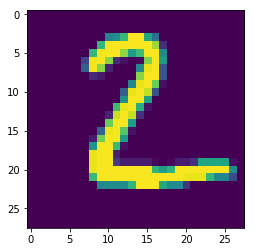

In [2]:
# Data Exploration
% matplotlib inline
from matplotlib import pyplot as plt
image = mnist.test.images[1].reshape([28,28])
plt.imshow(image)
label = mnist.test.labels[1]
print(label)

In [3]:
label.argmax(axis=0)

2

In [17]:
# len of training and testing data
print("The test data volume", len(mnist.test.images))
print("The train data volume", len(mnist.train.images))


The test data volume 10000
The train data volume 55000


In [18]:
# len of labels 
print("Testing", len(mnist.test.labels))
print("Training", len(mnist.train.labels))

Testing 10000
Training 55000


In [19]:
import tensorflow as tf

# Parameters
learning_rate = 0.00001
epochs = 1
batch_size = 128

# Number of samples to calculate validation and accuracy
test_valid_size = 256

# Network Parameters
n_classes = 10  # MNIST total classes (0-9 digits)
dropout = 0.75  # Dropout, probability to keep units

In [20]:
# Store layers weight & bias
weights = {
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 32])),
    'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64])),
    'wd1': tf.Variable(tf.random_normal([7*7*64, 1024])),
    'out': tf.Variable(tf.random_normal([1024, n_classes]))}

biases = {
    'bc1': tf.Variable(tf.random_normal([32])),
    'bc2': tf.Variable(tf.random_normal([64])),
    'bd1': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([n_classes]))}

In [41]:
def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

In [50]:
def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='SAME')

In [51]:
def conv_net(x, weights, biases, dropout):
    
    # TODO : Layer 1 - 28*28*1 to 14*14*32 
    #conv1
    cLayer1 = conv2d(x, weights['wc1'],biases['bc1'])
    #maxpool
    mPool1 = maxpool2d(cLayer1)
    
    # TODO: Layer 2 - 14*14*32 to 7*7*64
    #conv2
    cLayer2 = conv2d(mPool1, weights['wc2'], biases['bc2'])
    #maxpool
    mPool2 = maxpool2d(cLayer2)

    # TODO: Fully connected layer - 7*7*64 to 1024
    #reshape
    fcLayerIn = tf.reshape(mPool2, [-1, 7*7*64])
    #multiply and add bias
    mulBias = tf.matmul(fcLayerIn, weights['wd1'])
    mulAddBias = tf.add(mulBias, biases['bd1'])
    # relu activation
    fc1 = tf.nn.relu(mulAddBias)
    fc1 = tf.nn.dropout(fc1, dropout)

    # Output Layer - class prediction - 1024 to 10
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

In [52]:
# tf Graph input
x = tf.placeholder(tf.float32, [None, 28, 28, 1])
y = tf.placeholder(tf.float32, [None, n_classes])
keep_prob = tf.placeholder(tf.float32)

In [53]:
# Model
logits = conv_net(x, weights, biases, keep_prob)

In [54]:
# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

In [55]:
# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [56]:
# Initializing the variables
init = tf.global_variables_initializer()

In [57]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epochs):
        for batch in range(mnist.train.num_examples//batch_size):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y, keep_prob: dropout})

            # Calculate batch loss and accuracy
            loss = sess.run(cost, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.})
            valid_acc = sess.run(accuracy, feed_dict={
                x: mnist.validation.images[:test_valid_size],
                y: mnist.validation.labels[:test_valid_size],
                keep_prob: 1.})

            print('Epoch {:>2}, Batch {:>3} - Loss: {:>10.4f} Validation Accuracy: {:.6f}'.format(
                epoch + 1,
                batch + 1,
                loss,
                valid_acc))
            
            
     # Calculate Test Accuracy
    test_acc = sess.run(accuracy, feed_dict={
            x: mnist.test.images[:test_valid_size],
            y: mnist.test.labels[:test_valid_size],
            keep_prob: 1.})
    print('Testing Accuracy: {}'.format(test_acc))       

Epoch  1, Batch   1 - Loss: 54321.3906 Validation Accuracy: 0.117188
Epoch  1, Batch   2 - Loss: 37562.1484 Validation Accuracy: 0.101562
Epoch  1, Batch   3 - Loss: 40403.0547 Validation Accuracy: 0.085938
Epoch  1, Batch   4 - Loss: 31077.9531 Validation Accuracy: 0.093750
Epoch  1, Batch   5 - Loss: 36356.6797 Validation Accuracy: 0.074219
Epoch  1, Batch   6 - Loss: 31354.2695 Validation Accuracy: 0.082031
Epoch  1, Batch   7 - Loss: 30470.3887 Validation Accuracy: 0.078125
Epoch  1, Batch   8 - Loss: 26077.6191 Validation Accuracy: 0.078125
Epoch  1, Batch   9 - Loss: 30317.3262 Validation Accuracy: 0.078125
Epoch  1, Batch  10 - Loss: 30333.3711 Validation Accuracy: 0.089844
Epoch  1, Batch  11 - Loss: 29707.4473 Validation Accuracy: 0.097656
Epoch  1, Batch  12 - Loss: 26271.0371 Validation Accuracy: 0.089844
Epoch  1, Batch  13 - Loss: 29003.5781 Validation Accuracy: 0.097656
Epoch  1, Batch  14 - Loss: 21567.2422 Validation Accuracy: 0.105469
Epoch  1, Batch  15 - Loss: 23172.

Epoch  1, Batch 120 - Loss:  5607.7095 Validation Accuracy: 0.539062
Epoch  1, Batch 121 - Loss:  5241.8135 Validation Accuracy: 0.535156
Epoch  1, Batch 122 - Loss:  5874.7222 Validation Accuracy: 0.542969
Epoch  1, Batch 123 - Loss:  3950.5862 Validation Accuracy: 0.531250
Epoch  1, Batch 124 - Loss:  4063.6938 Validation Accuracy: 0.531250
Epoch  1, Batch 125 - Loss:  4261.7324 Validation Accuracy: 0.546875
Epoch  1, Batch 126 - Loss:  6927.7158 Validation Accuracy: 0.558594
Epoch  1, Batch 127 - Loss:  4936.6602 Validation Accuracy: 0.566406
Epoch  1, Batch 128 - Loss:  5399.1934 Validation Accuracy: 0.574219
Epoch  1, Batch 129 - Loss:  5193.9814 Validation Accuracy: 0.574219
Epoch  1, Batch 130 - Loss:  4808.8882 Validation Accuracy: 0.582031
Epoch  1, Batch 131 - Loss:  3975.6162 Validation Accuracy: 0.585938
Epoch  1, Batch 132 - Loss:  3755.2871 Validation Accuracy: 0.589844
Epoch  1, Batch 133 - Loss:  4802.3921 Validation Accuracy: 0.589844
Epoch  1, Batch 134 - Loss:  3773.

Epoch  1, Batch 239 - Loss:  2561.1453 Validation Accuracy: 0.695312
Epoch  1, Batch 240 - Loss:  2056.4453 Validation Accuracy: 0.687500
Epoch  1, Batch 241 - Loss:  2978.0989 Validation Accuracy: 0.687500
Epoch  1, Batch 242 - Loss:  2729.9756 Validation Accuracy: 0.691406
Epoch  1, Batch 243 - Loss:  2413.9639 Validation Accuracy: 0.699219
Epoch  1, Batch 244 - Loss:  3460.8796 Validation Accuracy: 0.695312
Epoch  1, Batch 245 - Loss:  2772.0190 Validation Accuracy: 0.695312
Epoch  1, Batch 246 - Loss:  2143.0825 Validation Accuracy: 0.703125
Epoch  1, Batch 247 - Loss:  2889.6252 Validation Accuracy: 0.687500
Epoch  1, Batch 248 - Loss:  3234.0430 Validation Accuracy: 0.707031
Epoch  1, Batch 249 - Loss:  3611.5098 Validation Accuracy: 0.703125
Epoch  1, Batch 250 - Loss:  3124.0039 Validation Accuracy: 0.699219
Epoch  1, Batch 251 - Loss:  2845.3840 Validation Accuracy: 0.707031
Epoch  1, Batch 252 - Loss:  2410.2854 Validation Accuracy: 0.707031
Epoch  1, Batch 253 - Loss:  3488.

Epoch  1, Batch 358 - Loss:  1488.1646 Validation Accuracy: 0.750000
Epoch  1, Batch 359 - Loss:  1560.4800 Validation Accuracy: 0.750000
Epoch  1, Batch 360 - Loss:  1850.6295 Validation Accuracy: 0.753906
Epoch  1, Batch 361 - Loss:  2452.7612 Validation Accuracy: 0.750000
Epoch  1, Batch 362 - Loss:  2030.1956 Validation Accuracy: 0.761719
Epoch  1, Batch 363 - Loss:   858.8138 Validation Accuracy: 0.757812
Epoch  1, Batch 364 - Loss:  2053.7412 Validation Accuracy: 0.761719
Epoch  1, Batch 365 - Loss:  1883.9835 Validation Accuracy: 0.769531
Epoch  1, Batch 366 - Loss:  2622.8201 Validation Accuracy: 0.769531
Epoch  1, Batch 367 - Loss:  2799.4607 Validation Accuracy: 0.765625
Epoch  1, Batch 368 - Loss:  2474.0732 Validation Accuracy: 0.769531
Epoch  1, Batch 369 - Loss:  1493.6174 Validation Accuracy: 0.769531
Epoch  1, Batch 370 - Loss:  2531.9136 Validation Accuracy: 0.781250
Epoch  1, Batch 371 - Loss:  1869.0336 Validation Accuracy: 0.765625
Epoch  1, Batch 372 - Loss:  2738.